# Avaliação de desempenho

## Imports

In [8]:
import pandas as pd
import numpy as np
import json


## Parâmetros e configurações

In [21]:
level = 'l2'
path_acc = 'dados/sa23z_acc_mapbiomas_80_2022.csv'
path_class_settings = 'dados/config_classes.json'
path_strata = 'dados/strata.csv'

## Entrada de dados

Arquivo com os dados de classificação e os dados de referencia de 2022, gerado no google earth engine:

https://code.earthengine.google.com/365963f4785378c21da4b24fa43061fb

so adicionado como limite o grupode de cartas SA-23-Z

In [53]:
df_acc = pd.read_csv(path_acc)
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,NEW_WEIGHT,PESO_VOT,PROB_AMOS2,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,55301.697925,0.000014,0.000014,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,60305.967634,0.000014,0.000014,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,60305.967634,0.000014,0.000014,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,60305.967634,0.000014,0.000014,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,60305.967634,0.000014,0.000014,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"


apenas as amostras SA23-Z

In [54]:
df_acc.shape

(712, 20)

Configuracao com as classes

In [55]:
with open(path_class_settings, 'r') as arquivo:
    config_classes = json.load(arquivo)
config_classes['IGNORED_CLASSES']

[0, 31, 32, 30, 25, 23, 5, 29]

Para não ignorar essas classes:

In [56]:
config_classes['IGNORED_CLASSES'] = [0]
config_classes['IGNORED_CLASSES']

[0]

Aqui, não irei usar o arquivo points_strata.csv, pois os dados do target_id estao errados na coleção das amostras

pegarei apenas o dadoq que tem a populacao por estrato

In [57]:
df_strata = pd.read_csv(path_strata)
df_strata.head()

,strata_id,pop
0,SH-21-Z_D1,22049360.0
1,SI-22-V_D1,19367713.0
2,SF-24-V_D1,4483278.0
3,SF-23-Z_D1,3193040.0
4,SC-24-Z_D1,18863275.0


In [58]:
df_strata.shape ## todas os estratos

(762, 2)

## Tratamento de dados

### Gerando a coluna strata_id

como os estrato id estao errados nos dados que tive acesso no mapbiomas, vou criar o estrato id com base no dado do estrato e da declividade

In [60]:
df_acc['strata_id'] = df_acc["CARTA_2"] + "_" + df_acc["DECLIVIDAD"]

verificando os estratos

In [61]:
df_acc["strata_id"].unique()

array(['SA-23-Z_D2', 'SA-23-Z_D1', 'SA-23-Z_D3', 'SA-23-Z_D4',
       'SA-23-Z_D6', 'SA-23-Z_D5'], dtype=object)

### Pegando os dados dado da populacao

In [62]:
df_acc = pd.merge(df_acc, df_strata, how='inner', on="strata_id")
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,PROB_AMOS2,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,0.000014,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,0.000014,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,0.000014,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,0.000014,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,0.000014,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0


In [63]:
df_acc['pop'].head()

0    27861902.0
1    25366123.0
2    25366123.0
3    25366123.0
4    25366123.0
Name: pop, dtype: float64

### Pegando a quantidade de amostras por estrato

contar a quantidade de amostras por estrato

<Axes: ylabel='strata_id'>

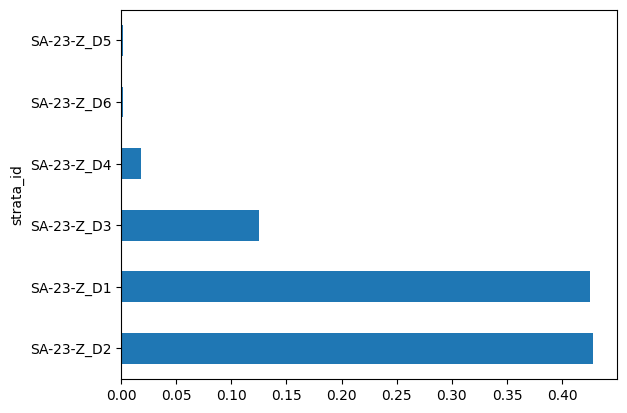

In [64]:
df_acc['strata_id'].value_counts(normalize=True).plot(kind='barh')

In [65]:
df_qt_samples = df_acc['strata_id'].value_counts().reset_index(name='n_samp')
df_qt_samples

,strata_id,n_samp
0,SA-23-Z_D2,305
1,SA-23-Z_D1,303
2,SA-23-Z_D3,89
3,SA-23-Z_D4,13
4,SA-23-Z_D6,1
5,SA-23-Z_D5,1


In [66]:
df_qt_samples.sum()

strata_id    SA-23-Z_D2SA-23-Z_D1SA-23-Z_D3SA-23-Z_D4SA-23-...
n_samp                                                     712
dtype: object

depois plotar um mapa os pontos por estrato

In [67]:
df_acc = pd.merge(df_acc, df_qt_samples, on='strata_id')
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop,n_samp
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303


verificar se esta ok numero de amostras e populacao

In [69]:
df_contagem = df_acc.groupby("strata_id")[['n_samp','pop']].first()
df_contagem

,n_samp,pop
strata_id,,
SA-23-Z_D1,303,25366123.0
SA-23-Z_D2,305,27861902.0
SA-23-Z_D3,89,7842002.0
SA-23-Z_D4,13,1111132.0
SA-23-Z_D5,1,4130.0
SA-23-Z_D6,1,2744.0


In [70]:
df_contagem.sum()

n_samp         712.0
pop       62188033.0
dtype: float64